In [3]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [17]:
image = img_to_array(load_img('./input_images/10000144A.jpg'))
image = np.array(image, dtype=float)

In [18]:
image

array([[[ 97.,  91.,  65.],
        [147., 141., 115.],
        [163., 157., 131.],
        ...,
        [197., 196., 191.],
        [187., 184., 167.],
        [186., 183., 166.]],

       [[133., 131., 108.],
        [183., 181., 158.],
        [200., 198., 177.],
        ...,
        [221., 220., 215.],
        [217., 213., 201.],
        [216., 212., 200.]],

       [[157., 155., 142.],
        [209., 207., 194.],
        [226., 224., 211.],
        ...,
        [230., 229., 225.],
        [222., 219., 210.],
        [220., 217., 208.]],

       ...,

       [[ 36.,  43.,  49.],
        [ 39.,  50.,  52.],
        [ 46.,  58.,  54.],
        ...,
        [221., 217., 208.],
        [229., 222., 206.],
        [213., 206., 190.]],

       [[ 28.,  45.,  55.],
        [ 33.,  53.,  60.],
        [ 29.,  50.,  51.],
        ...,
        [220., 216., 207.],
        [227., 220., 202.],
        [211., 204., 186.]],

       [[ 17.,  43.,  56.],
        [ 28.,  58.,  68.],
        [ 20.,  

In [1]:
def print_image_summary(image, labels):
    
    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis]
        
    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

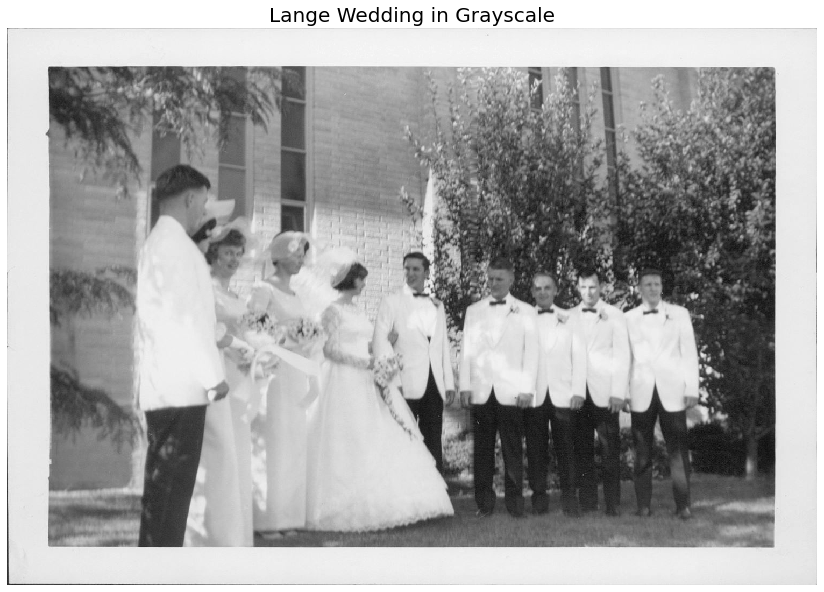

In [7]:
image_gs = imread('./input_images/10000144A.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(12, 18))
imshow(image_gs, ax=ax)
ax.set_title('Lange Wedding in Grayscale', fontsize=20)
ax.axis('off');

In [8]:
print_image_summary(image_gs, ['G'])

--------------
Image Details:
--------------
Image dimensions: (1035, 1506)
Channels:
G : min=0.0231, max=0.9843


In [9]:
image_rgb = imread('./input_images/10000144A.jpg')

In [10]:
print_image_summary(image_rgb, ['R', 'G', 'B'])

--------------
Image Details:
--------------
Image dimensions: (1035, 1506, 3)
Channels:
R : min=0.0000, max=251.0000
G : min=6.0000, max=251.0000
B : min=18.0000, max=252.0000


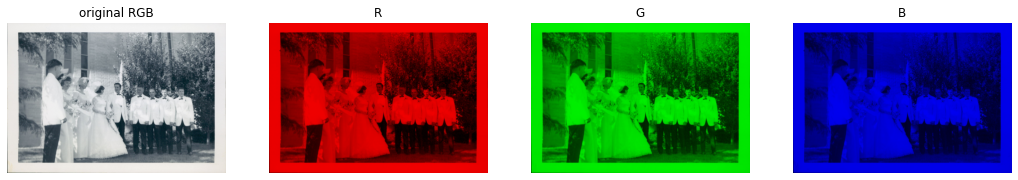

In [11]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))
ax[0].imshow(image_rgb/255.0) 
ax[0].axis('off')
ax[0].set_title('original RGB')
for i, lab in enumerate(['R','G','B'], 1):
    temp = np.zeros(image_rgb.shape)
    temp[:,:,i - 1] = image_rgb[:,:,i - 1]
    ax[i].imshow(temp/255.0) 
    ax[i].axis("off")
    ax[i].set_title(lab)
plt.show()

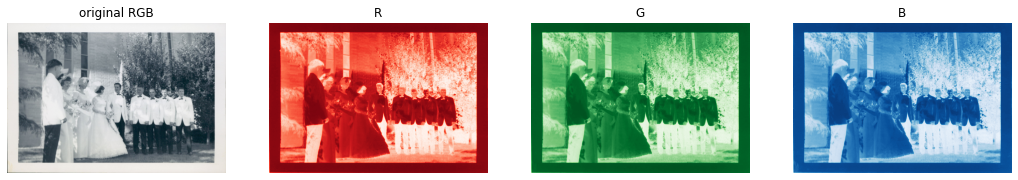

In [12]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))
ax[0].imshow(image_rgb) 
ax[0].axis('off')
ax[0].set_title('original RGB')
for i, cmap in enumerate(['Reds','Greens','Blues']):
    ax[i+1].imshow(image_rgb[:,:,i], cmap=cmap) 
    ax[i+1].axis('off')
    ax[i+1].set_title(cmap[0])
plt.show()

In [13]:
image_lab = rgb2lab(image_rgb / 255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\blang\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
C:\Users\blang\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


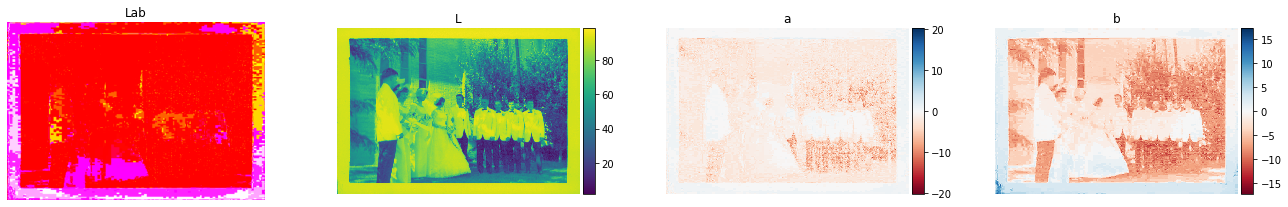

In [14]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))
ax[0].imshow(image_lab) 
ax[0].axis('off')
ax[0].set_title('Lab')
for i, col in enumerate(['L', 'a', 'b'], 1):
    imshow(image_lab[:, :, i-1], ax=ax[i])
    ax[i].axis('off')
    ax[i].set_title(col)
fig.show()

C:\Users\blang\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
C:\Users\blang\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


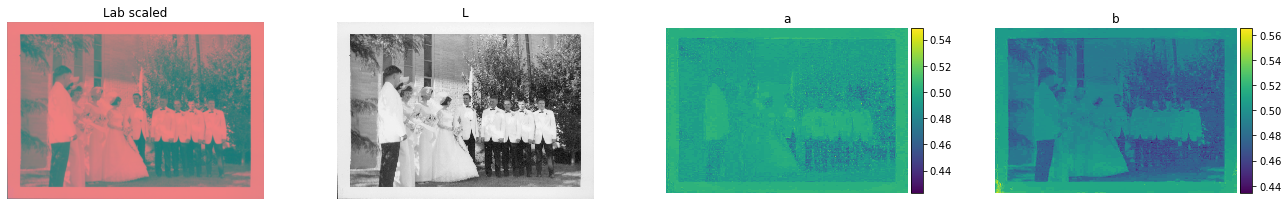

In [15]:
#scale the lab image
image_lab_scaled = (image_lab + [0, 128, 128]) / [100, 255, 255]
fig, ax = plt.subplots(1, 4, figsize = (18, 30))
ax[0].imshow(image_lab_scaled) 
ax[0].axis('off')
ax[0].set_title('Lab scaled')
for i, col in enumerate(['L', 'a', 'b'], 1):
    imshow(image_lab_scaled[:, :, i-1], ax=ax[i])
    ax[i].axis('off')
    ax[i].set_title(col)
    
fig.show()

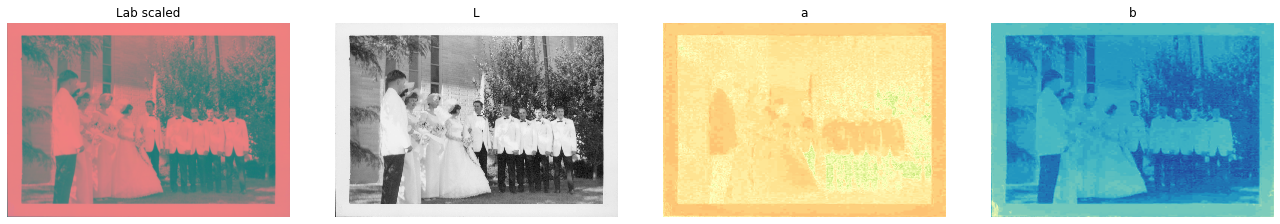

In [16]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))
ax[0].imshow(image_lab_scaled) 
ax[0].axis('off')
ax[0].set_title('Lab scaled')
imshow(image_lab_scaled[:,:,0], ax=ax[1]) 
ax[1].axis('off')
ax[1].set_title('L')
ax[2].imshow(image_lab_scaled[:,:,1], cmap='RdYlGn_r') 
ax[2].axis('off')
ax[2].set_title('a')
ax[3].imshow(image_lab_scaled[:,:,2], cmap='YlGnBu_r') 
ax[3].axis('off')
ax[3].set_title('b')
    
plt.show()